In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os, sys, time

from skimage.io import imread, imshow
from skimage.color import rgb2gray

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Project Proposal: PROPER FACE MASK DETECTION
### Gabriel Peter and Martina Radoslavov

The current pandemic has allowed for the mass-adoption of mask usage both in public and private spaces. In fact, legislation and local mandates have been put in place regarding "required proper mask usage" in order to promote public safety. However, a small subpopulation of the public, regardless of country and/or location, attempt to bypass the mandate by wearing a mask, but improperly. This negates the majority of the health protections enabled by a unified mask wearing population and is therefore a hazard for the safety of individuals at risk.

The goal of this project is to properly classify pictures of individuals who are not wearing a mask properly in an environment where it is pertinent they wear one properly (Hospital, Nursing Home, Daycares, etc.) 

Following Occam's Razor, we will start with trivial methods of multiclassification (i.e. KNN, Logistic Regression). We will likely be required to extract feature data from the images for these models. These features will require normalization (i.e. MinMaxScaler, StandardScaler). And then we will work our way up to more complex method (DNNs, CNNs, etc.) We may attempt a TensorFlow model as well. To determine if a model sufficiently classifies our classes we will perform a standard Cross-validation on each model, then provide addition high-level evaultion metric given their average test set performance. The train and test splitting will be achieved by randomly seperating a certain fraction of the images. 

The metrics for the classification algorithms will be based on accuracy, precision, recall and error values. However, there is not one set of metrics that will indicate a perfect model for this project because we would like to offer models with different strengths and weakness. For example, there are some cases were a false positive of any tangible amount may be unacceptable. However a larger crowd in a public space may benifit from less accuracy on "perfect mask wearing" as long as they are somewhat wearing one. This will also be determined by how we decide to encode the value for "Parital, Complete, and Non-existent" mask wearers during training for certain models.

We plan to use Python for this project. Some packages we initially expect to use are : numpy, pandas, matplotlib and sklearn



## The Dataset: 
[Face-Mask-Usage](https://www.kaggle.com/jamesnogra/face-mask-usage/download)

The data offers a collection of images of people with fully covered faces (1451 files), partially covered faces (392 images), not covered faces (3664 images), and lastly images of non faces (1114 images).

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
print('Categories', os.listdir('./face_mask_usage/'))
data_path = './face_mask_usage/'
for cat in os.listdir(data_path):
  cat_dir_path = os.path.join(data_path, cat)
  print(f'Count of {cat}:', len(os.listdir(cat_dir_path)))


Categories ['partially_covered', 'not_covered', 'fully_covered', 'not_face']
Count of partially_covered: 392
Count of not_covered: 3664
Count of fully_covered: 1451
Count of not_face: 1114


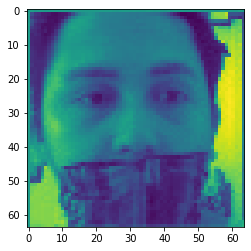

In [5]:
partially_covered_path = os.path.join(data_path, 'partially_covered')
example_img_path = os.path.join(partially_covered_path, os.listdir(partially_covered_path)[0])
example_img = img.imread(example_img_path)
plt.imshow(example_img)

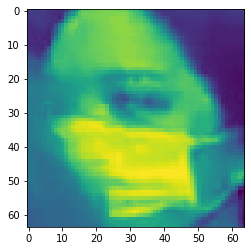

In [6]:
partially_covered_path = os.path.join(data_path, 'fully_covered')
example_img_path = os.path.join(partially_covered_path, os.listdir(partially_covered_path)[0])
example_img = img.imread(example_img_path)
plt.imshow(example_img)

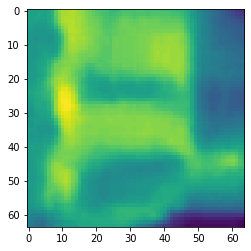

In [7]:
partially_covered_path = os.path.join(data_path, 'not_face')
example_img_path = os.path.join(partially_covered_path, os.listdir(partially_covered_path)[0])
example_img = img.imread(example_img_path)
plt.imshow(example_img)

# Data Cleaning and Pre-Processing

### Approaches do deal with high-features
- compute macro features of each object
- convolutions: reduce data without feature significance
- train on the entire bit-vector (computational ceiling via $64^2 = 4096$ pts per img)

### Inspirations:
- https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/#Logistic-regression-on-smaller-built-in-subset
- https://abeljoshuacruzada.wixsite.com/thinkingai/post/image-machine-learning-classification-without-neural-networks


In [8]:
# Convert Images into bit vectors, and put them in a pd.DataFrame
imgs = []
classification_labels = ['fully_covered', 'not_covered', 'not_face', 'partially_covered']
for _class in classification_labels:
    class_dir = os.path.join(data_path, _class)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = imread(img_path)
        if img.shape != (64,64): # sanity check
            continue
        imgs.append({
            'name': img_name,
            'features': np.array(img.flatten()),
            'target': _class
        })
        break
img_df = pd.DataFrame(imgs)
img_df

,name,features,target
0,klzqxmda.jpg,"[58, 60, 59, 57, 61, 55, 53, 52, 48, 48, 44, 6...",fully_covered
1,zdusbzjt.jpg,"[91, 95, 94, 86, 85, 77, 86, 95, 100, 114, 114...",not_covered
2,ngtikepf.jpg,"[96, 93, 93, 94, 94, 93, 96, 100, 112, 119, 12...",not_face
3,eubabyyw.jpg,"[148, 153, 148, 151, 151, 148, 149, 151, 150, ...",partially_covered


In [9]:
x = np.array(img_df.features)
y = np.array(img_df.target).ravel()

# Normalize the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
startTime = time.time()
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
time.time() - startTime

NameError: name 'time' is not defined